In [1]:
import os
import numpy as np
os.chdir('../../')
from src.data_loading import LoadCSV
from src.visualization.figure import signal
from src.timedelay_embedding import FindTimeDelay

In [15]:
### Settings

### figure
figure = signal({
        'font.family':'Times New Roman',
        'mathtext.fontset':'stix',
        'font.size':15,
        'xtick.direction':'in',
        'ytick.direction':'in',
        'axes.linewidth':1.5,
        'xtick.major.size':8,
        'ytick.major.size':8,
        }, 
        savefig=False, save_dir='',
        name='', file_type='')

### data loading
CSV_DATA_DIR = './data/vocal_ventricular_flow_rate_change/CSV/'
flow_rate = 40

### spectrogram
stfft_params = {'nperseg': 2000, 'cmap_lim': (-150, 0), 'freq_lim': (0, 500), 'cmap': 'jet'}

In [3]:
def visualization(data_name, steady_range, serch_size, bins):
    ### Load csv
    [time_all, mic_all, flow_all] = LoadCSV(file_path=CSV_DATA_DIR+data_name+'.csv', 
                                            data_name_list=['T', 'MIC', 'FLOW'], 
                                            sample_span=[0, None])
    flow_all *= flow_rate

    ### Figure
    figure.flow_timeseries_spectrogram(time_all, flow_all, mic_all, stfft_params,
                                title='Sound signal', ylabel=r'[V]',
                                ylim_flow=(None, 170), ylim_signal=(-5, 5),
                                steady_range=steady_range)

    ### Steady range
    time, mic, flow = time_all[steady_range[0]:steady_range[-1]], mic_all[steady_range[0]:steady_range[-1]], flow_all[steady_range[0]:steady_range[-1]]
    time -= time[0]
    print('Flow rate: '+str(np.average(flow)))

    ### Find time-delay
    ftd = FindTimeDelay(mic, search_size=serch_size)
    I = ftd.run(bins=bins, return_I=True)
    tau = ftd.result()

    ### Figure
    figure.timeseries_information_delaycoordinate(time, mic, I, tau, n_plt=2000)
    figure.timeseries_attractor_powerspectra(time, mic, tau, n_plt=1000, 
                                             x_lim=[-4.5, 4.5], f_lim=[0, 200], p_lim=[None, 1.3])

Loading csv data
file path | ./data/vocal_ventricular_flow_rate_change/CSV/FVF2_T2.csv
data list | T, MIC, FLOW


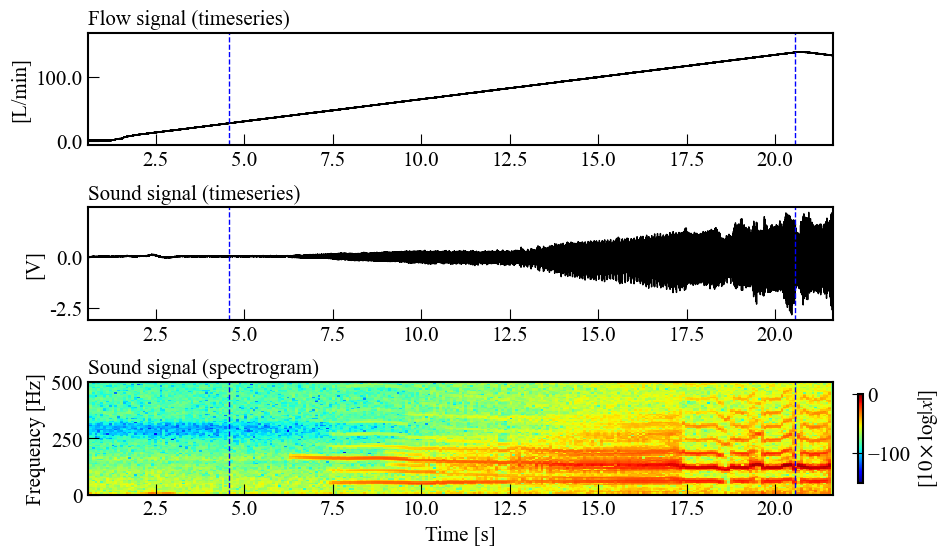

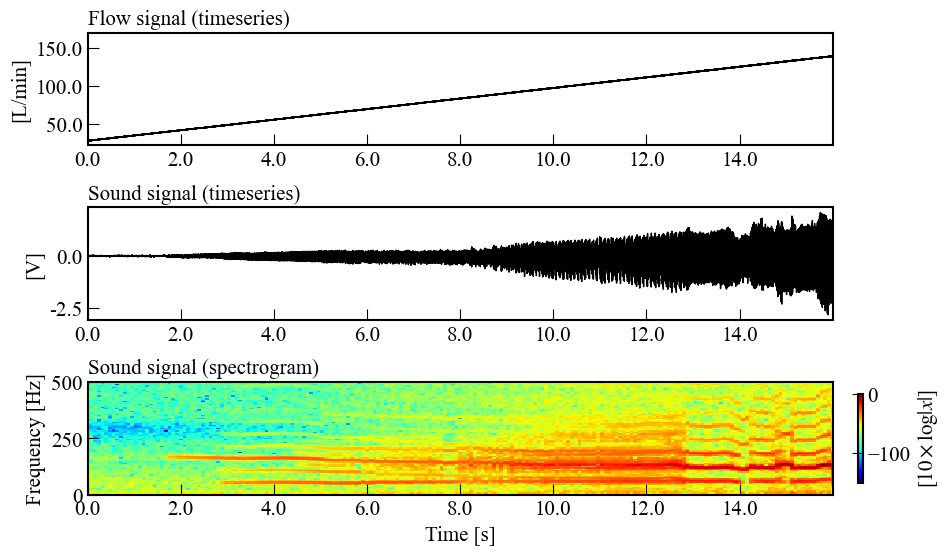

In [33]:
data_name = 'FVF2_T2'
steady_range = [50000, 250000]

### Load csv
[time_all, mic_all, flow_all] = LoadCSV(file_path=CSV_DATA_DIR+data_name+'.csv', 
                                        data_name_list=['T', 'MIC', 'FLOW'], 
                                        sample_span=[0, None])
flow_all *= flow_rate

### Figure
figure.flow_timeseries_spectrogram(time_all, flow_all, mic_all, stfft_params,
                                title='Sound signal', ylabel=r'[V]',
                                ylim_flow=(None, 170), ylim_signal=(None, None),
                                steady_range=steady_range)

time, mic, flow = time_all[steady_range[0]:steady_range[-1]], mic_all[steady_range[0]:steady_range[-1]], flow_all[steady_range[0]:steady_range[-1]]
time -= time[0]
figure.flow_timeseries_spectrogram(time, flow, mic, stfft_params,
                                title='Sound signal', ylabel=r'[V]',
                                ylim_flow=(None, 170), ylim_signal=(None, None),
                                steady_range=[None, None])

In [59]:
from scipy.signal import find_peaks

def fing_peaks_index(data, prominence):
    peaks_index, _ = find_peaks(data, prominence=prominence)
    peaks = data[peaks_index]
    return peaks, peaks_index

In [90]:
parameter_data = flow
signal_data = mic
time_data = time

sample_step = 1000

prominence = 0.2

start_points = (np.arange(0, len(signal_data), sample_step)).astype(int)

parameter_list = []
signal_list = []
time_list = []

for i in range(len(start_points)):
    parameter_list.append(np.average(parameter_data[start_points[i]:start_points[i]+sample_step]))
    signal_list.append(signal_data[start_points[i]:start_points[i]+sample_step])
    time_list.append(time_data[start_points[i]:start_points[i]+sample_step])

peaks_list = []
peaks_idx_list = []
for i in range(len(signal_list)):
    peaks, peaks_idx = fing_peaks_index(signal_list[i], prominence)
    peaks_list.append(peaks)
    peaks_idx_list.append(peaks_idx)

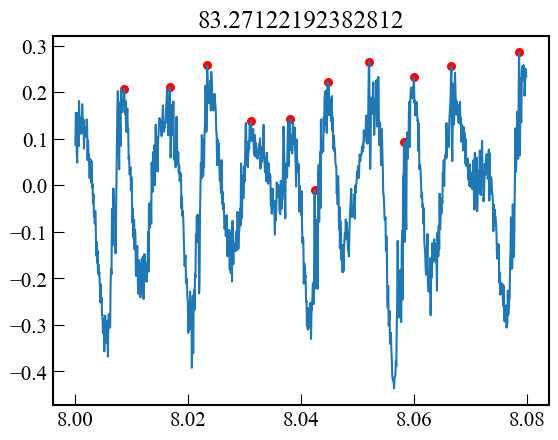

IndexError: index 983 is out of bounds for axis 0 with size 980

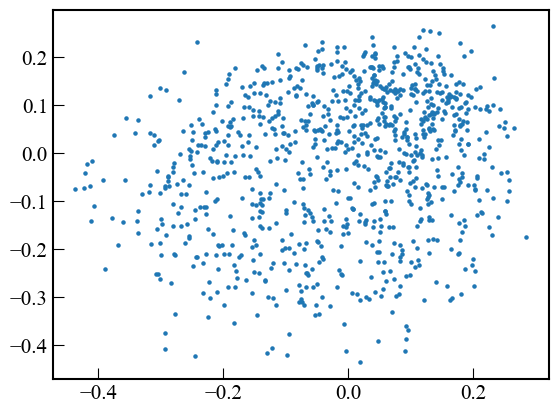

In [91]:
import matplotlib.pylab as plt

number = 100
tau = 20

plt.title(str(parameter_list[number]))
plt.plot(time_list[number], signal_list[number])
plt.scatter(time_list[number][peaks_idx_list[number]], peaks_list[number], c='r', s=30)
plt.show()

plt.scatter(signal_list[number][tau:], signal_list[number][:-tau], s=5)
plt.scatter(signal_list[number][tau:][peaks_idx_list[number]], signal_list[number][:-tau][peaks_idx_list[number]], c='r', s=5)
plt.show()

Loading csv data
file path | ./data/vocal_ventricular_flow_rate_change/CSV/FVF3_T2.csv
data list | T, MIC, FLOW


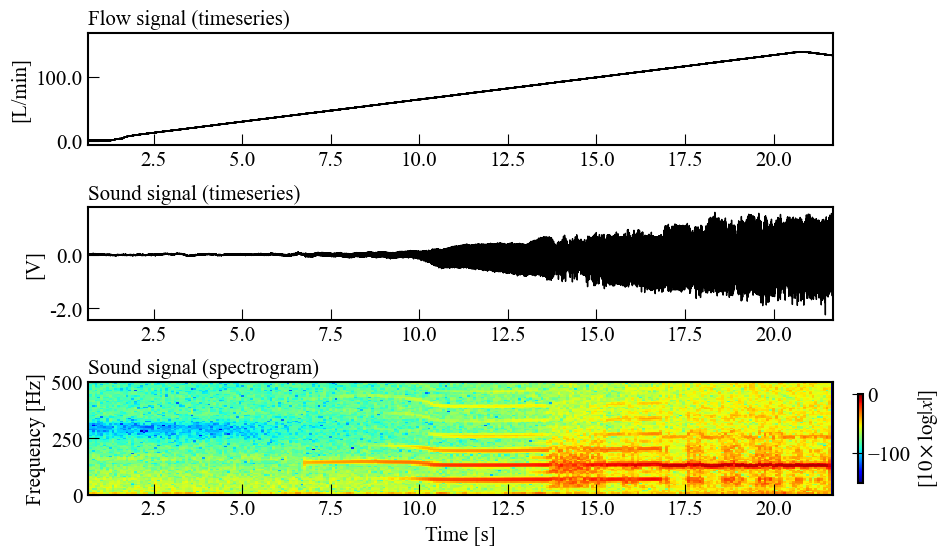

In [17]:
data_name = 'FVF3_T2'

### Load csv
[time_all, mic_all, flow_all] = LoadCSV(file_path=CSV_DATA_DIR+data_name+'.csv', 
                                        data_name_list=['T', 'MIC', 'FLOW'], 
                                        sample_span=[0, None])
flow_all *= flow_rate

### Figure
figure.flow_timeseries_spectrogram(time_all, flow_all, mic_all, stfft_params,
                                title='Sound signal', ylabel=r'[V]',
                                ylim_flow=(None, 170), ylim_signal=(None, None),
                                steady_range=[None, None])